### Importing Packages and Cleaning Data

In [5]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
comments = pd.read_csv(r"E:\Programming\Projects\Youtube Analysis\Data\UScomments.csv" , on_bad_lines="skip")

C:\Users\Damini\AppData\Local\Temp\ipykernel_1404\756474473.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r"E:\Programming\Projects\Youtube Analysis\Data\UScomments.csv" , on_bad_lines="skip")


In [7]:
comments.head(5)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [8]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [9]:
comments.dropna(inplace=True)

In [10]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

### Performing Sentiment Analysis
    

In [11]:
import nltk

In [13]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Damini\AppData\Roaming\nltk_data...


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [13]:
sia = SentimentIntensityAnalyzer()

In [14]:
comments["comment_text"]

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [15]:
sia.polarity_scores("MY FAN . attendance")['compound']

0.4648

In [16]:
sentimen_scores = []

for comment in comments ["comment_text"]:
    score = sia.polarity_scores(str(comment))['compound']
    sentimen_scores.append(score)

In [18]:
sample_df = comments [0:10000]

In [19]:
sentimen_scores

[0.0,
 0.0,
 0.0,
 0.4648,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5719,
 -0.7717,
 0.0,
 0.2023,
 -0.3877,
 0.4404,
 0.0,
 0.5719,
 0.0772,
 0.0,
 0.6369,
 0.0085,
 -0.4466,
 0.1225,
 0.6486,
 -0.1027,
 0.8769,
 0.0,
 -0.5106,
 0.8283,
 -0.2883,
 0.982,
 0.4404,
 0.6841,
 0.0,
 0.0,
 0.6486,
 -0.9421,
 -0.3806,
 0.1376,
 0.2619,
 0.128,
 0.0,
 0.0,
 0.6642,
 0.0,
 -0.3818,
 0.9226,
 0.5859,
 0.1901,
 -0.656,
 -0.7758,
 -0.5423,
 0.6486,
 -0.4939,
 0.5627,
 -0.1027,
 0.0,
 -0.4767,
 0.9337,
 0.6579,
 -0.4574,
 0.0,
 0.5267,
 0.0,
 -0.9005,
 0.6369,
 0.9124,
 0.9112,
 0.7845,
 -0.5499,
 0.0,
 0.0,
 0.0,
 0.7249,
 0.0,
 0.2263,
 0.0,
 0.0772,
 0.0,
 0.0,
 0.4404,
 0.0,
 0.0,
 0.0,
 -0.5423,
 -0.5994,
 -0.5574,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2714,
 0.0,
 0.0,
 0.5719,
 0.0,
 0.6841,
 0.0,
 0.5502,
 0.4404,
 0.5126,
 -0.7262,
 0.2732,
 -0.7578,
 0.3182,
 -0.2924,
 -0.2821,
 -0.5737,
 -0.6597,
 0.6979,
 0.3612,
 0.9117,
 0.1531,
 -0.947,
 -0.8062,
 -0.9457,
 0.0721,
 0.5994,
 -0.5996,
 -0.3857,
 0.0,

In [20]:
comments["polarity"] = sentimen_scores

In [21]:
comments.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.0000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.0000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.5719
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.7717


### Performing Wordcloud Analysis of the data

In [22]:
filter_pos = (comments ["polarity"] >=0.8) & (comments["polarity"]<1.0)

In [23]:
comments_pos = comments[filter_pos]

In [24]:
comments_pos

,video_id,comment_text,likes,replies,polarity
24,XpVt6Z1Gjjo,I love Logan and Jake so much and thay are so ...,1,0,0.8769
27,XpVt6Z1Gjjo,if you get allot of diss likes do you get on t...,0,0,0.8283
29,XpVt6Z1Gjjo,I love you so much I love to meet you But I li...,0,0,0.9820
45,XpVt6Z1Gjjo,"This looks like a great video, but after you a...",0,0,0.9226
57,XpVt6Z1Gjjo,Congrats Logan love u so much someday I would ...,0,0,0.9337
...,...,...,...,...,...
691312,EoejGgUNmVU,"Fabulous video, just so wonderful live.It's so...",0,0,0.9329
691322,EoejGgUNmVU,I love each and every version of this song. LP...,0,0,0.8402
691324,EoejGgUNmVU,Absolutely fabulous ! LP has the genius to ren...,0,0,0.9397
691345,EoejGgUNmVU,Beautiful LP! You are gorgeous!,0,0,0.8585


In [25]:
comments_pos.shape

(64308, 5)

In [26]:
filter_neg = (comments ["polarity"] >= -1.0) & (comments["polarity"]<-0.8)

In [27]:
comments_neg = comments[filter_neg]

In [28]:
comments_neg

,video_id,comment_text,likes,replies,polarity
35,XpVt6Z1Gjjo,"Evan is being a douch Logans getting pissed, L...",0,0,-0.9421
63,XpVt6Z1Gjjo,No one fucking cares. You're a 12 year old. Th...,0,0,-0.9005
113,cLdxuaxaQwc,OK guys i get that the word was once used as a...,0,0,-0.9470
114,cLdxuaxaQwc,pewdiepie had nothing to be sorry about. ever...,0,0,-0.8062
115,cLdxuaxaQwc,I think other YouTube's who are hatting at him...,0,0,-0.9457
...,...,...,...,...,...
691254,qRoVlH1OcI4,I swear that Trump supporters would eat warm d...,0,0,-0.8979
691259,qRoVlH1OcI4,there are many reasons for taking a knee to th...,0,0,-0.9065
691262,qRoVlH1OcI4,it's odd to think how many people keep asking ...,0,0,-0.9538
691263,qRoVlH1OcI4,So when we take a knee for fallen soldiers tha...,0,0,-0.8519


In [29]:
comments_neg.shape

(16140, 5)

In [30]:
from wordcloud import WordCloud , STOPWORDS

In [31]:
total_pos_comments = ''.join(comments_pos["comment_text"])

In [32]:
total_pos_comments [0:1000]

"I love Logan and Jake so much and thay are so amazing and I look up to them so much 😍💋💙👍if you get allot of diss likes do you get on the top comments? lets see diss like this pleaseI love you so much I love to meet you But I live in Israel You really inspire me I really like your channel Keep doing what you do\\nBecause everyone loves it and will be Unique and Pashan will be creative and I hope you will see it byeThis looks like a great video, but after you are done would you be kind enough to check out my new YouTube channel and give me some feedback? Maybe even subscribing? :)Congrats Logan love u so much someday I would love to meet u #1 fan of the logang ❤️Well done I LOVE! You so much :DI am very happy for this man and we need to spread more love. United we stand, divided we fall.And this could in all honestly become a good thing for you. You sit on a platform where you could really educate people especially when so many of your fans seem to think it's okay to be said. Really lea

In [33]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [34]:
wordcloud_pos = WordCloud(stopwords=set(STOPWORDS)).generate(total_pos_comments)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

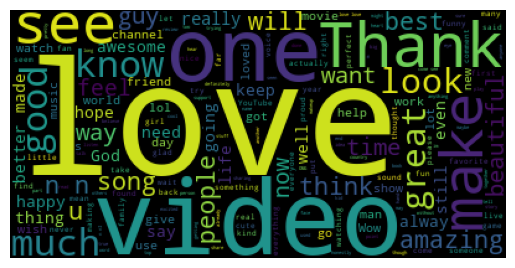

In [35]:
plt.imshow(wordcloud_pos)
plt.axis("off")

In [36]:
total_neg_comments = ''.join(comments_neg["comment_text"])

In [37]:
wordcloud_neg = WordCloud(stopwords=set(STOPWORDS)).generate(total_neg_comments)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

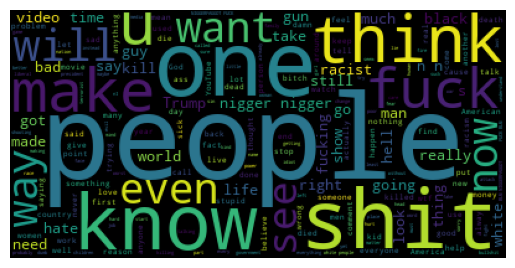

In [38]:
plt.imshow(wordcloud_neg)
plt.axis('off')

### Performing Emoji Analysis

In [39]:
import emoji

In [40]:
emoji.__version__

'2.2.0'

In [41]:
comments.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.0000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.0000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.5719
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.7717


In [43]:
emojis_info = emoji.emoji_list("trending 😉")

In [44]:
emojis_info

[{'match_start': 9, 'match_end': 10, 'emoji': '😉'}]

In [46]:
[item["emoji"] for item in emojis_info]

['😉']

In [49]:
comments['comment_text'].head(10)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
6                                 The end though 😭👍🏻❤️
7                                 #1 trending!!!!!!!!!
8                          Happy one year vlogaversary
9    You and your shit brother may have single hand...
Name: comment_text, dtype: object

In [50]:
all_emojis_found = []

for comment in comments["comment_text"]:
    emojis_info = emoji.emoji_list(comment)
    emojis_found = [item["emoji"] for item in emojis_info]
    all_emojis_found.extend(emojis_found)
    

In [51]:
all_emojis_found[0:30]

['‼️',
 '‼️',
 '‼️',
 '😉',
 '😭',
 '👍🏻',
 '❤️',
 '😍',
 '💋',
 '💙',
 '👍',
 '👈',
 '😂',
 '🔥',
 '😂',
 '😂',
 '😂',
 '😂',
 '👻',
 '❤️',
 '😂',
 '❤️',
 '💎',
 '😆',
 '😆',
 '😆',
 '😆',
 '😆',
 '😆',
 '😁']

In [52]:
from collections import Counter

In [54]:
emojis_top10 = Counter(all_emojis_found).most_common(10)

In [78]:
emojis_top10

[('😂', 36987),
 ('😍', 33453),
 ('❤️', 16911),
 ('❤', 14167),
 ('🔥', 8694),
 ('😭', 8398),
 ('😘', 5545),
 ('💖', 5359),
 ('💕', 5147),
 ('👍', 4251)]

In [79]:
emojis = [emoji for emoji, count in emojis_top10]
counts = [count for emoji, count in emojis_top10]

In [80]:
emojis

['😂', '😍', '❤️', '❤', '🔥', '😭', '😘', '💖', '💕', '👍']

In [81]:
counts

[36987, 33453, 16911, 14167, 8694, 8398, 5545, 5359, 5147, 4251]

In [82]:
import plotly.graph_objs as go
from plotly.offline import plot

In [83]:
plot([go.Bar(x = emojis, y = counts)])

'temp-plot.html'

In [ ]:
## Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..

### Collecting the Entire Youtube Data

In [84]:
import os

In [86]:
files = os.listdir(r"E:\Programming\Projects\Youtube Analysis\Data\additional_data")

In [87]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [88]:

files_csv = [file for file in files if '.csv' in file]

In [89]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [90]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

#### different types of encoding-->>
    Note : encoding may change depending upon data  , country data , sometimes regional data as well.
    Fore more inforation on Encoding -- Follow below
### https://docs.python.org/3/library/codecs.html#standard-encodings¶

In [93]:
full_df = pd.DataFrame()
path = r'E:\Programming\Projects\Youtube Analysis\Data\additional_data'
for file in files_csv:
    current_df = pd.read_csv(path+'/'+file , encoding='iso-8859-1' , on_bad_lines="skip")
    full_df = pd.concat([full_df , current_df] , ignore_index=True)

In [94]:
full_df.shape

(375942, 16)

### Exporting the data into (csv, json, db)

In [ ]:
### upto some extent your data is cleaned , so lets export this data into various formats for further analysis :

In [95]:
full_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
375937     True
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

In [96]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [2]:
'''
default value of keep='first'

It means that the method will consider the first instance of a row to be unique and the remaining instances to be duplicates.


keep='first' (default): mark all rows as duplicates except for the first occurrence.

keep='last': mark all rows as duplicates except for the last occurrence.

keep=False: mark all rows as all duplicates.


'''

"\ndefault value of keep='first'\n\nIt means that the method will consider the first instance of a row to be unique and the remaining instances to be duplicates.\n\n\nkeep='first' (default): mark all rows as duplicates except for the first occurrence.\n\nkeep='last': mark all rows as duplicates except for the last occurrence.\n\nkeep=False: mark all rows as all duplicates.\n\n\n"

In [97]:
full_df = full_df.drop_duplicates() 

In [98]:
full_df.shape

(339525, 16)

#### Exporting to CSV

In [99]:

full_df[0:1000].to_csv(r'E:\Programming\Projects\Youtube Analysis\Data\export_data/sample_1.csv' , index=False)

#### Exporting to JSON

In [100]:

full_df[0:1000].to_json(r'E:\Programming\Projects\Youtube Analysis\Data\export_data/sample_1.json' , index=False)

#### Storing into a Database

In [103]:
from sqlalchemy import create_engine

In [104]:

engine = create_engine(r'sqlite:///E:\Programming\Projects\Youtube Analysis\Data\export_data/sample_1.sqlite')

In [105]:

full_df[0:1000].to_sql('Users' , con=engine , if_exists='append')

1000

In [ ]:
## As soon as u have u have your data into 'youtube_sample.sqlite' which has table has 'Users', now u can read data from this db file 'youtube_whole_data.sqlite' using sqlite3 & pandas

### Category with Maximum Likes

In [106]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [107]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [108]:
json_df = pd.read_json(r"E:\Programming\Projects\Youtube Analysis\Data\additional_data/US_category_id.json")

In [109]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [111]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [112]:
json_df['items'][2]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
 'id': '10',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Music',
  'assignable': True}}

In [116]:
cat_dict = {}

for item in json_df['items'].values:
   cat_dict[int(item['id'])] = item['snippet']['title']

In [117]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [118]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [120]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


<Axes: xlabel='category_name', ylabel='likes'>

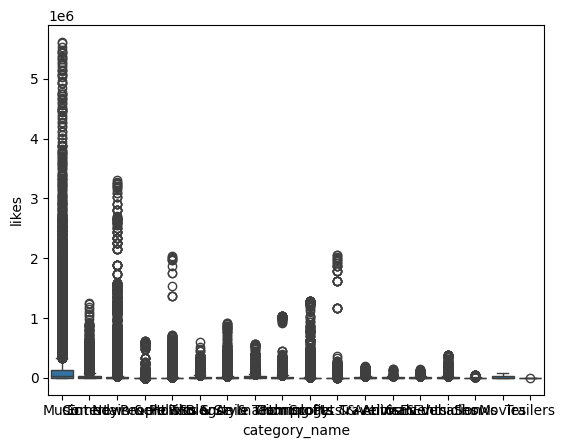

In [121]:
sns.boxplot(x='category_name', y='likes', data=full_df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

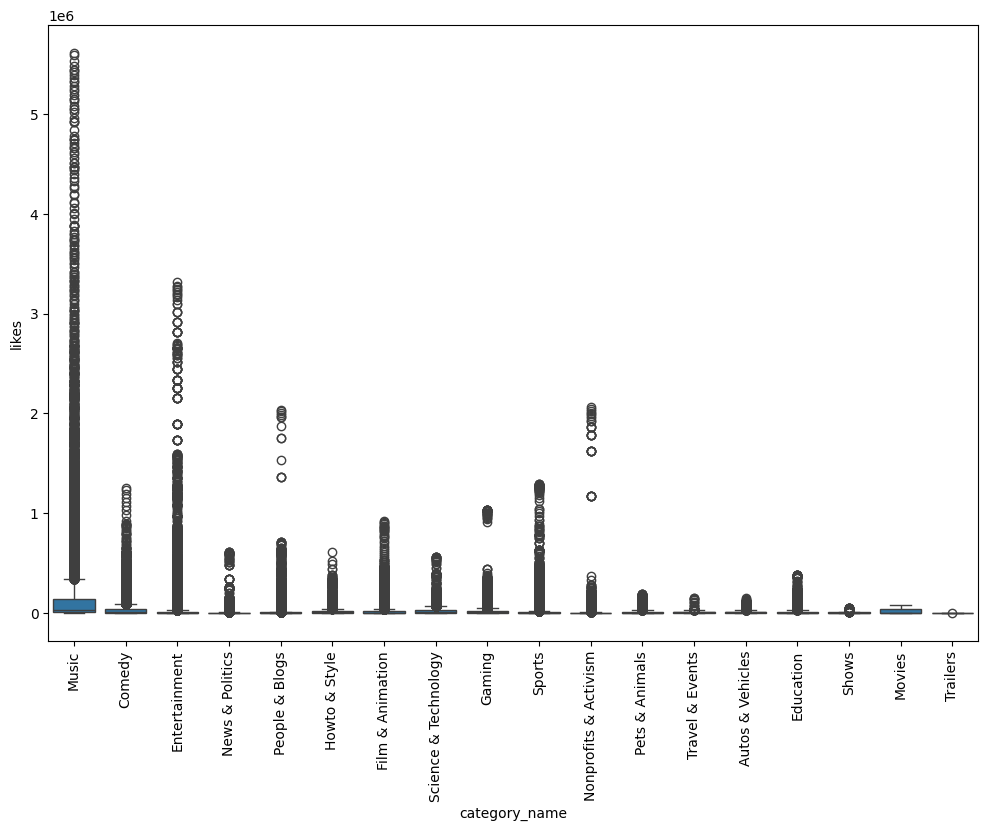

In [122]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')

### Finding whether the audience is engaged

In [126]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [127]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

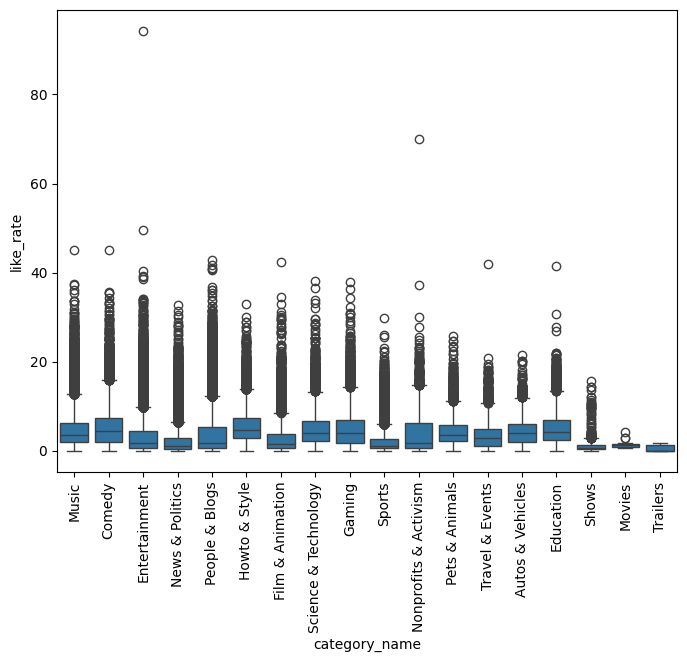

In [128]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name' , y='like_rate' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

### Relationship between views and likes

<Axes: xlabel='views', ylabel='likes'>

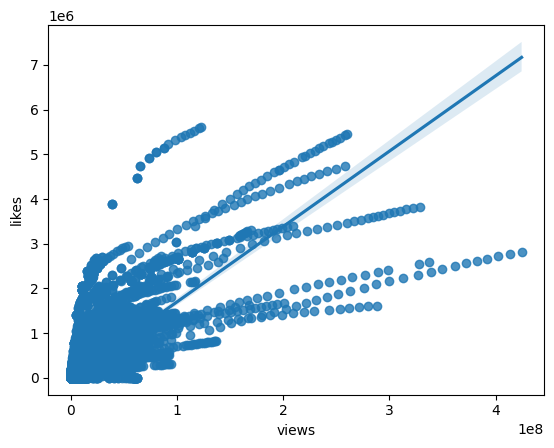

In [129]:
sns.regplot(x='views' , y='likes' , data = full_df)

In [130]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

### Finding the co-relation values ['views', 'likes', 'dislikes']

In [ ]:
full_df[['views', 'likes', 'dislikes']].corr() 

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

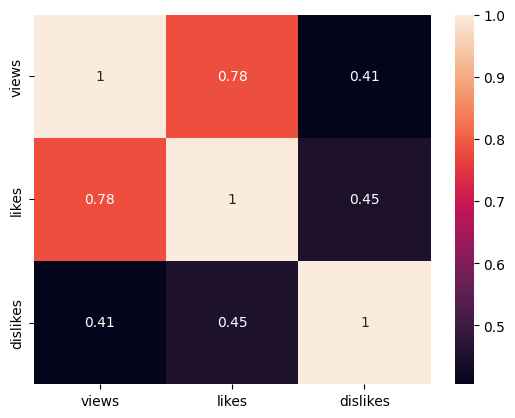

In [132]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr() , annot=True)

### Channels with the highest number of trending videos

In [133]:
full_df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,âº Follow for News! - https://twitter.com/KEE...,News & Politics,7.922049,0.352218,0.927160


In [134]:
full_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
The Secrets of Dairy                    1
babygranderecords                       1
24 Oras News Today                      1
turk2doubleoh8                          1
BOOMPANOT.COM                           1
Name: count, Length: 37824, dtype: int64

In [135]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [137]:
cdf = cdf.rename(columns={0:'total_videos'})

In [138]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Tesoros Enterrados,1
37820,Anton Neverov,1
37821,Thalia 444,1
37822,Thaitv6 Official,1


In [139]:
import plotly.express as px

In [144]:
import plotly.io as pio

# Options: 'browser', 'iframe', 'svg', 'png'
pio.renderers.default = "browser"

fig = px.bar(cdf[0:20], x="channel_title", y="total_videos")
fig.show()


### Do Punctuations in video titles and tags have a relationship with views, likes, dislikes comments?

In [145]:
full_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [146]:
import string

In [147]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [148]:
len([char for char in full_df['title'][0] if char in string.punctuation])

4

In [149]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [150]:
sample = full_df[0:10000]

In [151]:
sample['count_punc'] = sample['title'].apply(punc_count)

In [152]:
sample['count_punc']

0       4
1       1
2       3
3       3
4       3
       ..
9995    6
9996    0
9997    1
9998    0
9999    6
Name: count_punc, Length: 10000, dtype: int64

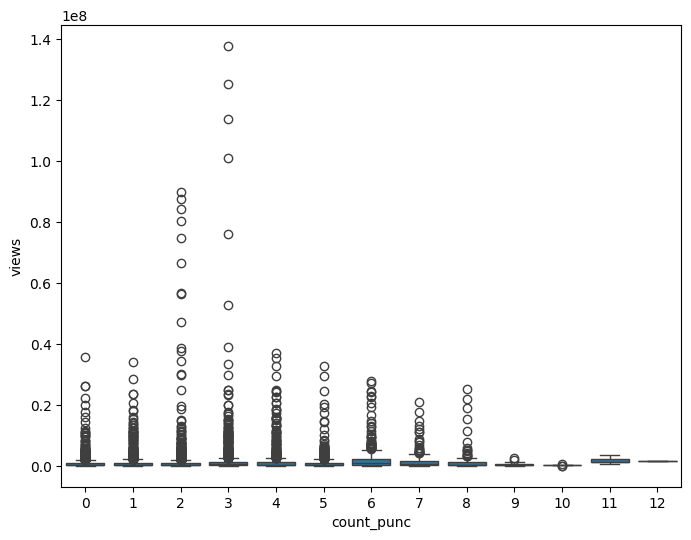

In [153]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='views' , data=sample)
plt.show()

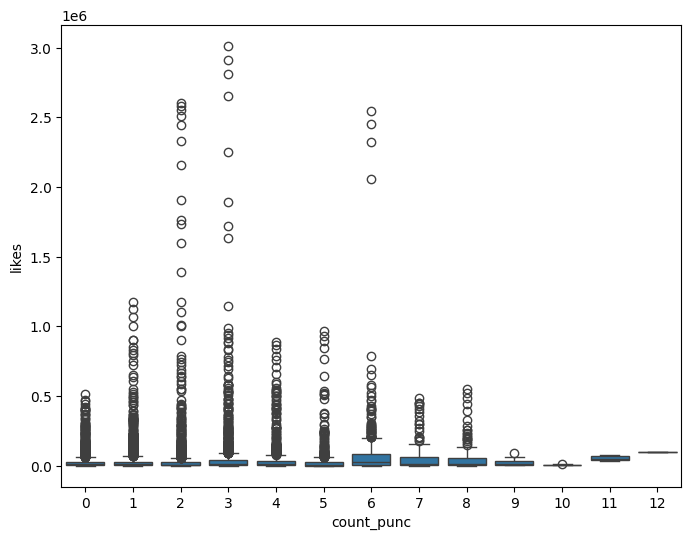

In [154]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='likes' , data=sample)
plt.show()